In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [3]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [4]:
ds.sel(longitude=-82)

<xarray.Dataset>
Dimensions:    (latitude: 89, time: 500)
Coordinates:
    longitude  float32 -82.0
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude) float32 ...
    skt        (time, latitude) float32 ...
    tp         (time, latitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [5]:
ds.sel(longitude=-82, latitude=5.75, time='2018-01-01')

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    longitude  float32 -82.0
    latitude   float32 5.75
    expver     int32 1
    time       datetime64[ns] 2018-01-01
Data variables:
    lai_hv     float32 ...
    skt        float32 ...
    tp         float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [6]:
#ds.sel(longitude=99)

In [7]:
ds.sel(longitude=99, method='nearest')

<xarray.Dataset>
Dimensions:    (latitude: 89, time: 500)
Coordinates:
    longitude  float32 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude) float32 ...
    skt        (time, latitude) float32 ...
    tp         (time, latitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [8]:
ds.sel(latitude=[-16,-15], longitude=[-46,-47], method='nearest')

<xarray.Dataset>
Dimensions:    (longitude: 2, latitude: 2, time: 500)
Coordinates:
  * longitude  (longitude) float32 -46.75 -47.0
  * latitude   (latitude) float32 -16.0 -15.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [9]:
ds.isel(latitude=0, longitude=0)

<xarray.Dataset>
Dimensions:    (time: 500)
Coordinates:
    longitude  float32 -82.0
    latitude   float32 6.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time) float32 ...
    skt        (time) float32 ...
    tp         (time) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [10]:
QUERY = ds.longitude < -64
QUERY = QUERY & (ds.latitude > -8)

#ds.where(QUERY, drop = True)

(array([1.180000e+02, 3.424000e+03, 3.899800e+04, 1.086510e+05,
        1.537960e+05, 3.378610e+05, 1.026602e+06, 4.416252e+06,
        2.071530e+05, 8.690000e+02]),
 array([266.84399414, 271.17169189, 275.49935913, 279.82705688,
        284.15472412, 288.48242188, 292.81011963, 297.13778687,
        301.46548462, 305.79315186, 310.12084961]),
 <BarContainer object of 10 artists>)

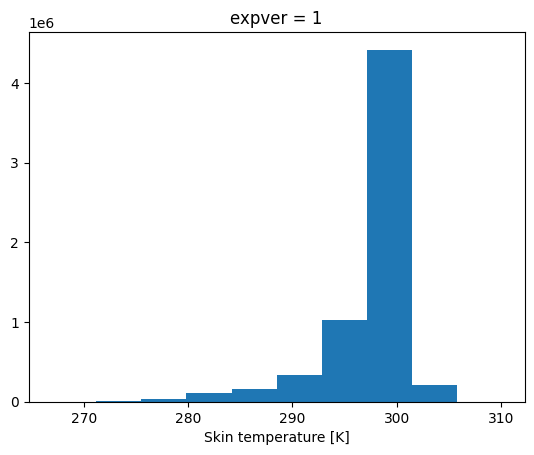

In [11]:
ds.skt.plot()

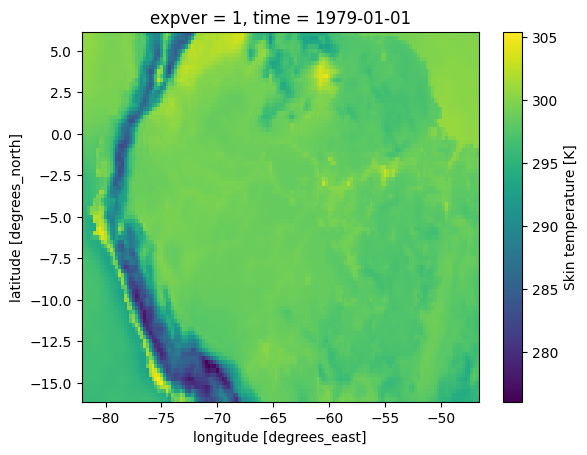

In [12]:
ds.isel(time=0).skt.plot()

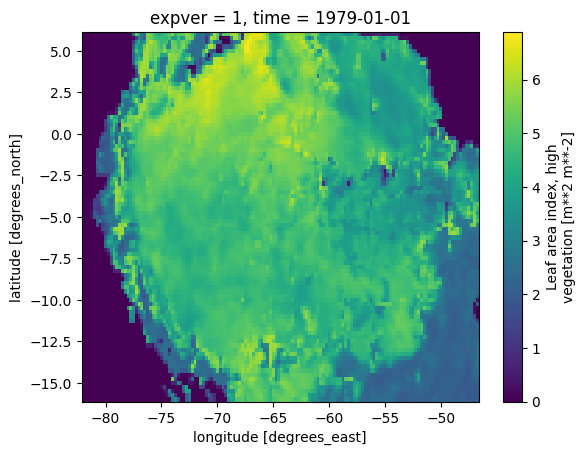

In [13]:
ds.isel(time=0).lai_hv.plot()

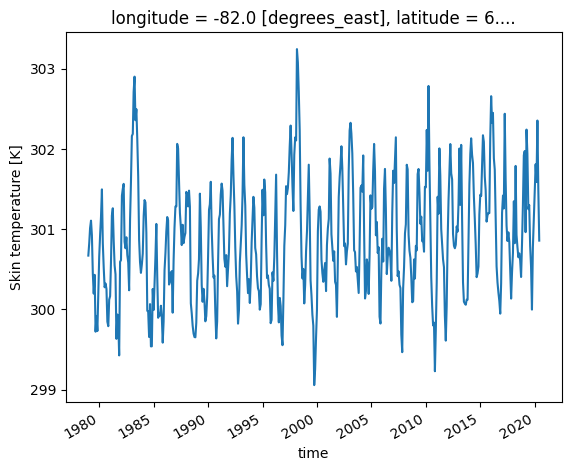

In [14]:
ds.isel(longitude=0, latitude=0).skt.plot()

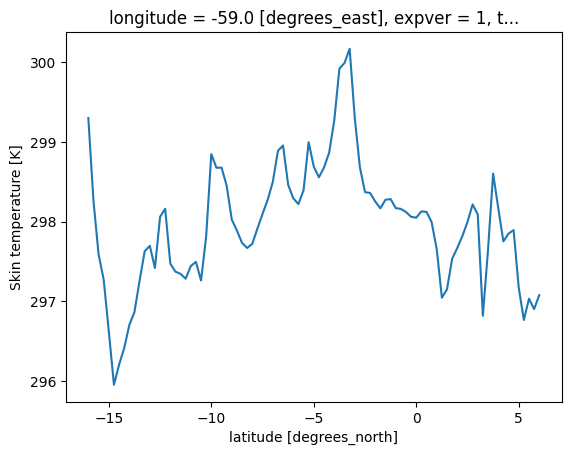

In [15]:
ds.isel(time=0).sel(longitude=-59, method='nearest').skt.plot()

In [16]:
tempo_change = (ds.skt.sel(time='2019-01-01')-ds.skt.sel(time='1979-01-01'))
tempo_change

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[ 1.2527466 ,  1.277832  ,  1.2758484 , ...,  0.03961182,
         0.1076355 ,  0.19018555],
       [ 1.1880188 ,  1.197937  ,  1.1669006 , ..., -0.01123047,
         0.01257324,  0.08056641],
       [ 1.0024719 ,  0.996521  ,  0.9423828 , ..., -0.04425049,
        -0.05215454, -0.00726318],
       ...,
       [-0.3295288 , -0.3163147 , -0.27075195, ...,  3.6135864 ,
         3.400299  ,  3.5396423 ],
       [-0.3942566 , -0.38238525, -0.36849976, ...,  3.4597168 ,
         3.4241028 ,  3.6142578 ],
       [-0.45632935, -0.5249939 , -0.51708984, ...,  3.402954  ,
         3.262268  ,  3.3210754 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

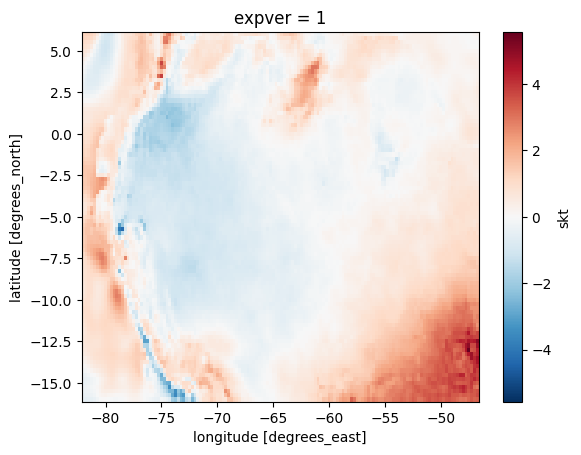

In [17]:
tempo_change.plot()

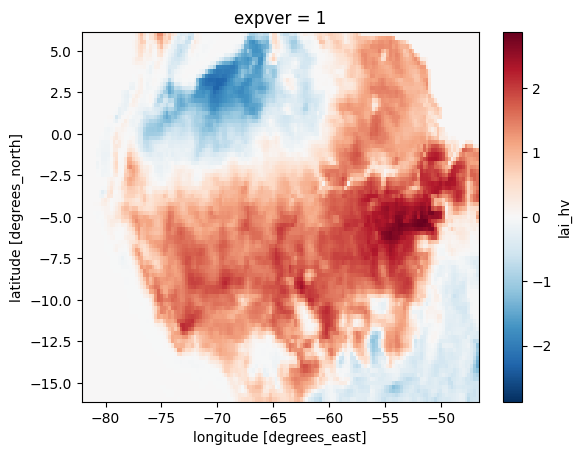

In [18]:
sazonal_change = (ds.lai_hv.sel(time='2019-07-01')-ds.lai_hv.sel(time='2019-01-01'))
sazonal_change.plot()

In [19]:
ds.skt.mean()

<xarray.DataArray 'skt' ()>
array(297.2683, dtype=float32)
Coordinates:
    expver   int32 1

In [20]:
mean_temp = ds.skt.mean(dim='time')
mean_temp

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[300.8873 , 300.82703, 300.74887, ..., 300.67136, 300.66446,
        300.68234],
       [300.84076, 300.78116, 300.67752, ..., 300.68323, 300.6837 ,
        300.6877 ],
       [300.74652, 300.67358, 300.57083, ..., 300.68448, 300.693  ,
        300.69904],
       ...,
       [293.93396, 293.92303, 293.89307, ..., 296.69812, 296.79724,
        296.8227 ],
       [293.86404, 293.85193, 293.81693, ..., 296.30548, 296.46127,
        296.48813],
       [293.79874, 293.77878, 293.74445, ..., 296.21536, 296.3526 ,
        296.1909 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

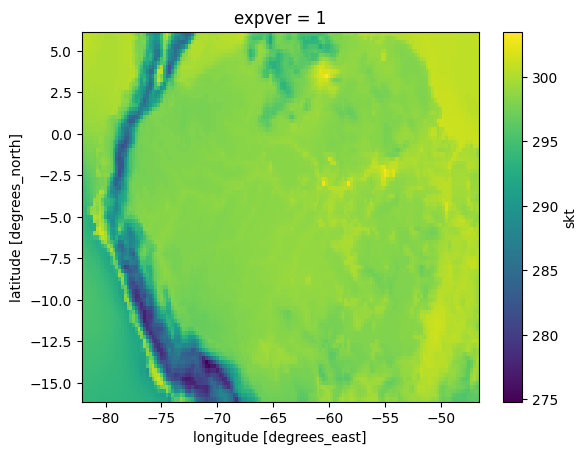

In [21]:
mean_temp.plot()

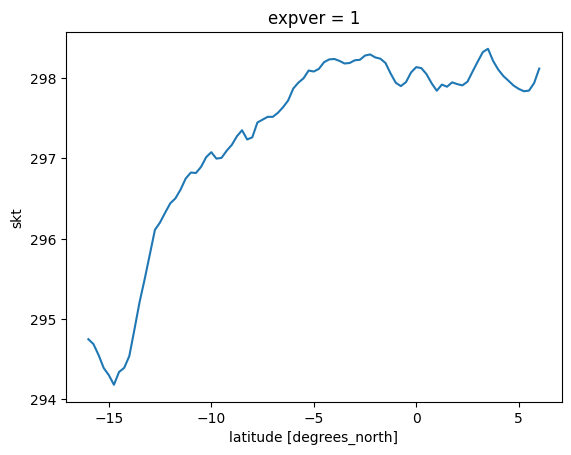

In [22]:
mean_temp = ds.skt.mean(dim=['time', 'longitude'])
mean_temp.plot()

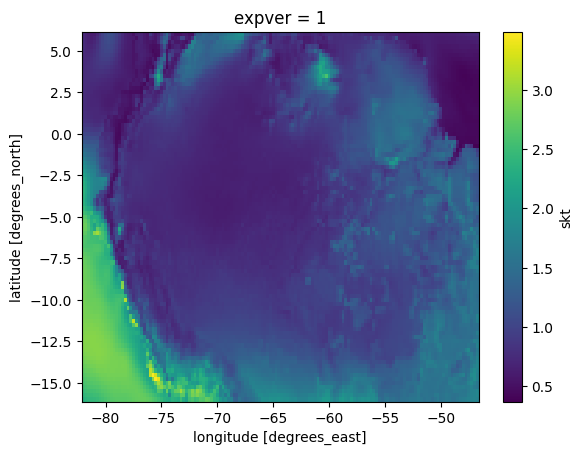

In [23]:
std_temp = ds.skt.std(dim='time')
std_temp.plot()

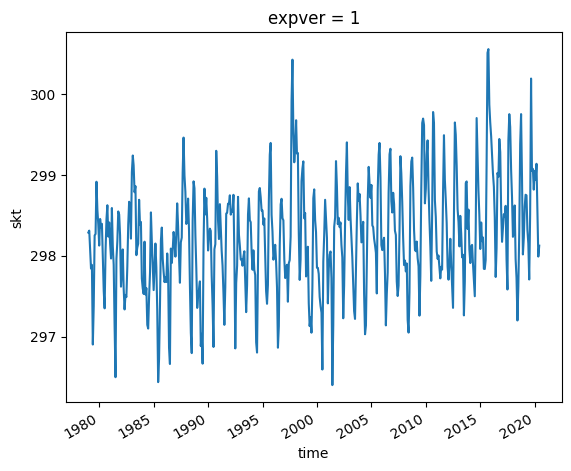

In [24]:
ds.skt.median(dim=['longitude', 'latitude']).plot()

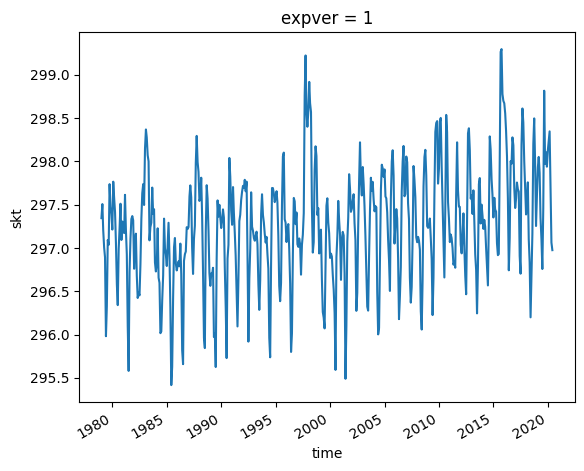

In [25]:
ds.skt.mean(dim=['longitude', 'latitude']).plot()

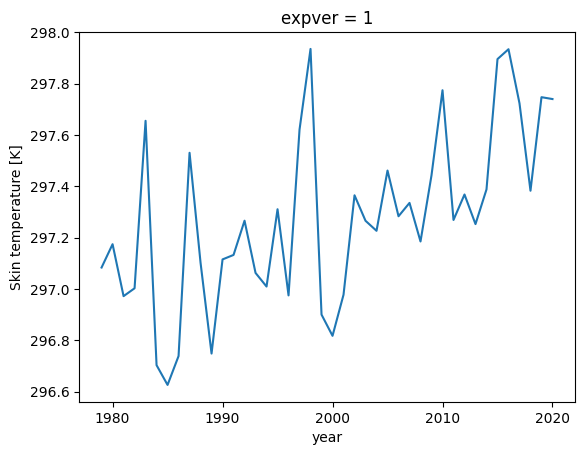

In [26]:
(ds.groupby(ds.time.dt.year)).mean(dim=['time', 'latitude', 'longitude']).skt.plot()

In [27]:
(ds.groupby(ds.time.dt.year)).mean(dim=['time', 'latitude', 'longitude']).skt

<xarray.DataArray 'skt' (year: 42)>
array([297.08368, 297.17456, 296.9722 , 297.0028 , 297.65518, 296.70334,
       296.6264 , 296.73883, 297.5306 , 297.1022 , 296.74857, 297.11533,
       297.13272, 297.26608, 297.06268, 297.0096 , 297.3107 , 296.9751 ,
       297.6209 , 297.93518, 296.90033, 296.81763, 296.97772, 297.36505,
       297.26578, 297.2267 , 297.46146, 297.2834 , 297.33542, 297.18515,
       297.44296, 297.77426, 297.26892, 297.36813, 297.25284, 297.38797,
       297.89557, 297.93402, 297.72333, 297.3828 , 297.74722, 297.73993],
      dtype=float32)
Coordinates:
    expver   int32 1
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019 2020
Attributes:
    units:      K
    long_name:  Skin temperature

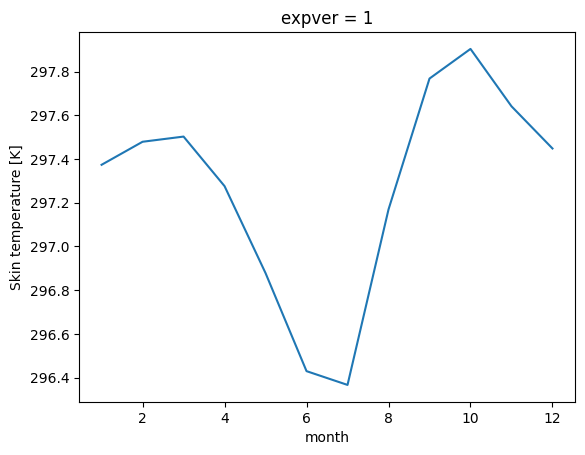

In [28]:
(ds.groupby(ds.time.dt.month)).mean(dim=['time', 'latitude', 'longitude']).skt.plot()

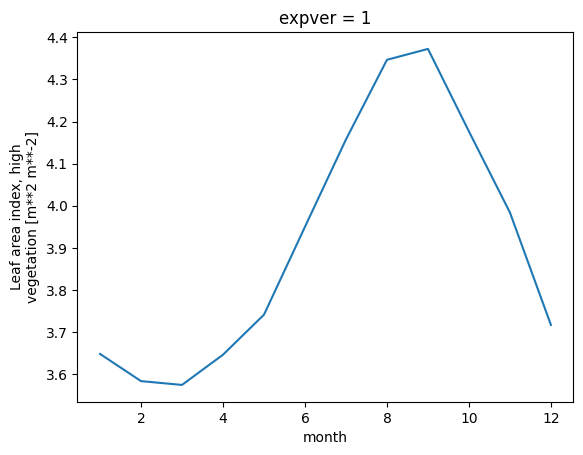

In [29]:
(ds.groupby(ds.time.dt.month)).mean(dim=['time', 'latitude', 'longitude']).lai_hv.plot()

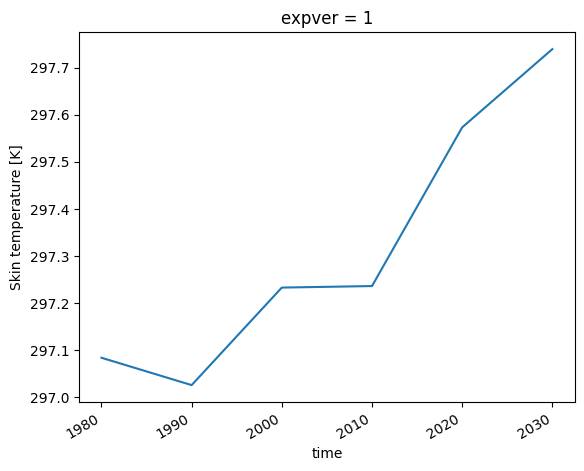

In [30]:
ds.resample({'time':'10y'}).mean(dim=['time', 'longitude', 'latitude']).skt.plot()

In [31]:
da = ds.time.dt.year
da

<xarray.DataArray 'year' (time: 500)>
array([1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979,
       1979, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
       1980, 1980, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981,
       1981, 1981, 1981, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982,
       1982, 1982, 1982, 1982, 1983, 1983, 1983, 1983, 1983, 1983, 1983,
       1983, 1983, 1983, 1983, 1983, 1984, 1984, 1984, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1985, 1985, 1985, 1985, 1985,
       1985, 1985, 1985, 1985, 1985, 1985, 1985, 1986, 1986, 1986, 1986,
       1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1987, 1987, 1987,
       1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1988, 1988,
       1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1989,
       1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989,
       1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
       1990, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991,
       1991, 1991, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
       1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993,
       1993, 1993, 1993, 1993, 1994, 1994, 1994, 1994, 1994, 1994, 1994,
       1994, 1994, 1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995,
       1995, 1995, 1995, 1995, 1995, 1995, 1996, 1996, 1996, 1996, 1996,
       1996, 1996, 1996, 1996, 1996, 1996, 1996, 1997, 1997, 1997, 1997,
...
       2002, 2002, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
       2003, 2003, 2003, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
       2004, 2004, 2004, 2004, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
       2005, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006,
       2006, 2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007,
       2007, 2007, 2007, 2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008,
       2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009,
       2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020,
       2020, 2020, 2020, 2020, 2020])
Coordinates:
    expver   int32 1
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01

In [32]:
ds_1 = ds.merge(da)

In [33]:
da = ds.longitude**2 + ds.latitude **2
da.name = 'squared_distance'
ds_2 = ds.merge(da)
ds_2

<xarray.Dataset>
Dimensions:           (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude         (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude          (latitude) float32 6.0 5.75 5.5 ... -15.5 -15.75 -16.0
    expver            int32 1
  * time              (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv            (time, latitude, longitude) float32 ...
    skt               (time, latitude, longitude) float32 300.7 300.6 ... nan
    tp                (time, latitude, longitude) float32 ...
    squared_distance  (longitude, latitude) float32 6.76e+03 ... 2.442e+03
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [34]:
ds_3 = ds_1.merge(ds_2)
ds_3

<xarray.Dataset>
Dimensions:           (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude         (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude          (latitude) float32 6.0 5.75 5.5 ... -15.5 -15.75 -16.0
    expver            int32 1
  * time              (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv            (time, latitude, longitude) float32 0.0 0.0 ... nan nan
    skt               (time, latitude, longitude) float32 300.7 300.6 ... nan
    tp                (time, latitude, longitude) float32 0.0004338 ... nan
    year              (time) int64 1979 1979 1979 1979 ... 2020 2020 2020 2020
    squared_distance  (longitude, latitude) float32 6.76e+03 ... 2.442e+03
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [35]:
ds_square_root = ds_3 ** (0.5)
ds_cube_root = ds_3 ** (1/3)
ds_4 = xr.concat([ds_3, ds_square_root, ds_cube_root], 'dim_power')
ds_4

<xarray.Dataset>
Dimensions:           (longitude: 142, latitude: 89, time: 500, dim_power: 3)
Coordinates:
  * longitude         (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude          (latitude) float32 6.0 5.75 5.5 ... -15.5 -15.75 -16.0
    expver            int32 1
  * time              (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Dimensions without coordinates: dim_power
Data variables:
    lai_hv            (dim_power, time, latitude, longitude) float32 0.0 ... nan
    skt               (dim_power, time, latitude, longitude) float32 300.7 .....
    tp                (dim_power, time, latitude, longitude) float32 0.000433...
    year              (dim_power, time) float64 1.979e+03 1.979e+03 ... 12.64
    squared_distance  (dim_power, longitude, latitude) float32 6.76e+03 ... 1...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

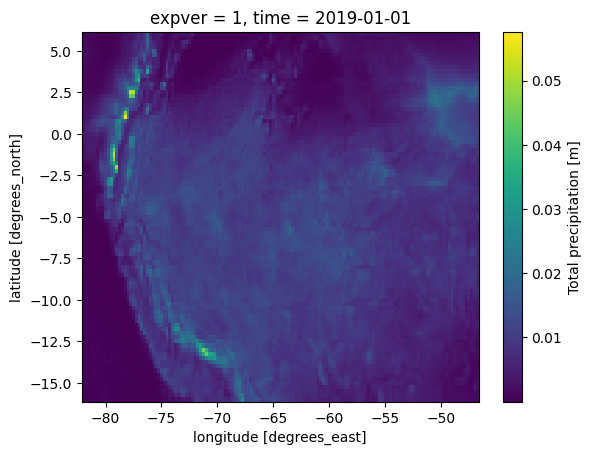

In [36]:
ds.sel(time='2019-01-01').tp.plot()

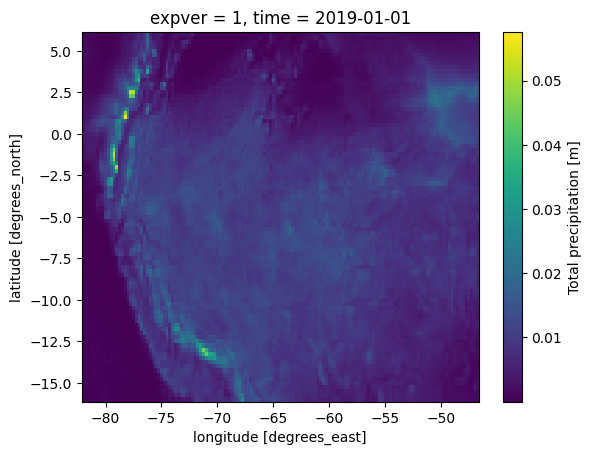

In [37]:
ds_4.sel(dim_power=0, time='2019-01-01').tp.plot()

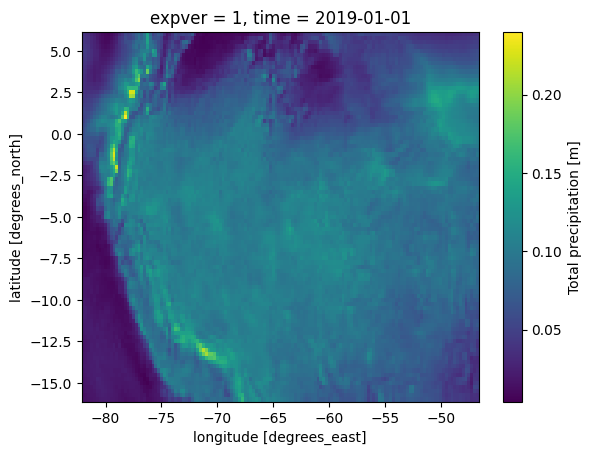

In [38]:
ds_4.sel(dim_power=1, time='2019-01-01').tp.plot()

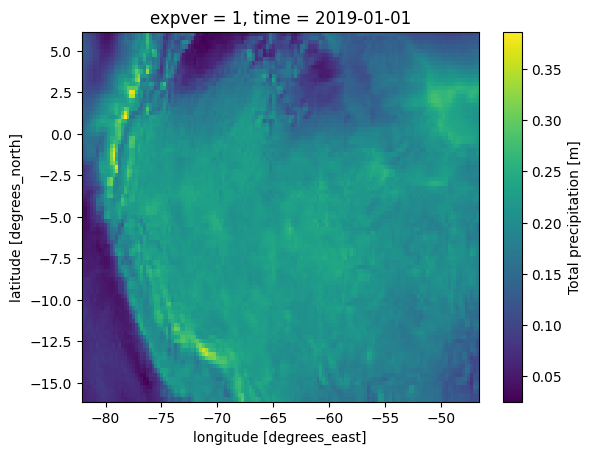

In [39]:
ds_4.sel(dim_power=2, time='2019-01-01').tp.plot()

In [40]:
df = ds.to_dataframe()
print(df)

                               expver    lai_hv         skt        tp
longitude latitude time                                              
-82.00     6.0     1979-01-01       1  0.000000  300.670105  0.000434
                   1979-02-01       1  0.000000  300.829926  0.001139
                   1979-03-01       1  0.000000  301.014832  0.005566
                   1979-04-01       1  0.000000  301.105957  0.011398
                   1979-05-01       1  0.000000  300.924347  0.009486
...                               ...       ...         ...       ...
-46.75    -16.0    2020-04-01       1  1.905231  295.797791  0.004340
                   2020-05-01       1  1.735271  293.425049  0.001070
                   2020-06-01       1  1.578286  293.098816  0.000035
                   2020-07-01       1       NaN         NaN       NaN
                   2020-08-01       1       NaN         NaN       NaN

[6319000 rows x 4 columns]


In [41]:
da = ds.time.dt.month
print(da.to_dataframe())

            expver  month
time                     
1979-01-01       1      1
1979-02-01       1      2
1979-03-01       1      3
1979-04-01       1      4
1979-05-01       1      5
...            ...    ...
2020-04-01       1      4
2020-05-01       1      5
2020-06-01       1      6
2020-07-01       1      7
2020-08-01       1      8

[500 rows x 2 columns]


In [42]:
da.to_series()

time
1979-01-01    1
1979-02-01    2
1979-03-01    3
1979-04-01    4
1979-05-01    5
             ..
2020-04-01    4
2020-05-01    5
2020-06-01    6
2020-07-01    7
2020-08-01    8
Name: month, Length: 500, dtype: int64

In [43]:
xr.Dataset.from_dataframe(df)

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float64 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float64 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    expver     (longitude, latitude, time) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    lai_hv     (longitude, latitude, time) float32 0.0 0.0 0.0 ... 1.578 nan nan
    skt        (longitude, latitude, time) float32 300.7 300.8 301.0 ... nan nan
    tp         (longitude, latitude, time) float32 0.0004338 0.001139 ... nan

In [44]:
xr.DataArray.from_series(df.skt)

<xarray.DataArray 'skt' (longitude: 142, latitude: 89, time: 500)>
array([[[300.6701 , 300.82993, 301.01483, ..., 300.857  ,       nan,
               nan],
        [300.647  , 300.77512, 300.85104, ..., 300.8352 ,       nan,
               nan],
        [300.6351 , 300.7619 , 300.71237, ..., 300.8121 ,       nan,
               nan],
        ...,
        [295.848  , 296.73026, 297.36688, ..., 293.81006,       nan,
               nan],
        [295.81894, 296.68536, 297.25528, ..., 293.8061 ,       nan,
               nan],
        [295.77206, 296.6583 , 297.15753, ..., 293.6714 ,       nan,
               nan]],

       [[300.60406, 300.71503, 300.84116, ..., 300.79227,       nan,
               nan],
        [300.58426, 300.63312, 300.65756, ..., 300.80417,       nan,
               nan],
        [300.56906, 300.57236, 300.47595, ..., 300.7784 ,       nan,
               nan],
...
        [295.55347, 296.13065, 296.93893, ..., 293.72025,       nan,
               nan],
        [295.31308, 295.9061 , 296.6028 , ..., 293.30817,       nan,
               nan],
        [295.3362 , 296.01376, 296.56384, ..., 293.1675 ,       nan,
               nan]],

       [[299.58643, 299.99585, 300.03284, ..., 301.48172,       nan,
               nan],
        [299.75018, 300.15436, 300.1418 , ..., 301.52466,       nan,
               nan],
        [299.8968 , 300.27322, 300.2303 , ..., 301.59332,       nan,
               nan],
        ...,
        [295.77997, 296.26733, 297.01688, ..., 293.55383,       nan,
               nan],
        [295.47687, 295.99988, 296.6596 , ..., 293.22165,       nan,
               nan],
        [295.1995 , 295.83215, 296.38223, ..., 293.09882,       nan,
               nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float64 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01

In [45]:
ds.to_netcdf('export.nc')

In [46]:
xr.open_dataset('export.nc')

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...